In [1]:
from deepface import DeepFace
from keras.models import load_model
import cv2 as cv2
import numpy as np
from typing import Any, Dict, Union,List
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation
from keras import layers, Model


In [3]:

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [4]:
model = vgg_face()

In [5]:
model.load_weights("D:/Face Recognition VGG/vgg_face_weights.h5")

In [6]:
base_model_output = Sequential()
base_model_output = Flatten()(model.layers[-5].output)
vgg_model = Model(inputs=model.input, outputs=base_model_output)

In [7]:
def load_image(img_path):
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    face_objs = DeepFace.extract_faces(img_path = img_path, 
        target_size = (224, 224), 
        detector_backend = "opencv"
)
    for img1_obj in face_objs:
        img1_content = img1_obj["face"]
        img = img1_content
        plt.imshow(img1_content)
        return img[...,::-1]

In [8]:
def preprocess_image(img_path):
    img = load_image(img_path)

    img = np.expand_dims(img, axis=0)
    return img

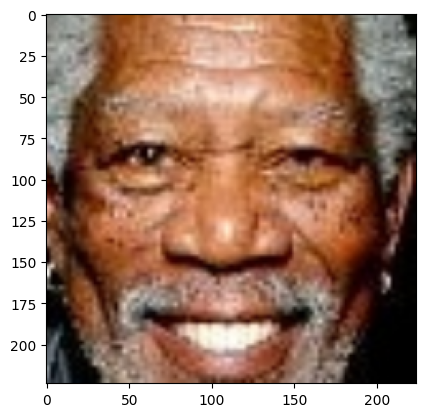

In [34]:
image1 = preprocess_image("D:/img3.jpg")
image2 = preprocess_image("D:/img4.jpg")


In [35]:
embd1 = vgg_model.predict(image1)
embd2 = vgg_model.predict(image2)


1/1 [==============================] - 0s 403ms/step


In [36]:
def l2_normalize(x: Union[np.ndarray, list]) -> np.ndarray:
    if isinstance(x, list):
        x = np.array(x)
    return x / np.sqrt(np.sum(np.multiply(x, x)))

In [37]:
embd1 = l2_normalize(embd1[0])
embd2 = l2_normalize(embd2[0])

In [38]:
def find_cosine_distance(
    source_representation: Union[np.ndarray, list], test_representation: Union[np.ndarray, list]
) -> np.float64:

    if isinstance(source_representation, list):
        source_representation = np.array(source_representation)

    if isinstance(test_representation, list):
        test_representation = np.array(test_representation)

    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))


In [39]:
result = find_cosine_distance(source_representation=embd1,test_representation=embd2)
embd1 = DeepFace.verification.l2_normalize(embd1)
embd2 = DeepFace.verification.l2_normalize(embd2)
res = DeepFace.verification.find_cosine_distance(embd1,embd2)

In [40]:
res

0.4252285957336426

In [41]:
threshold = DeepFace.verification.find_threshold(model_name="VGG-Face",distance_metric="cosine")

In [42]:
res

0.4252285957336426

In [43]:
if res <= 0.68:
    print("True")
else:
    print("False")
    print(res-0.68)

True


In [44]:
res2 = DeepFace.verify("D:/img6.jpg","D:/img7.jpg")

In [45]:
res2

{'verified': True,
 'distance': 0.25560388951522406,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 26, 'y': 65, 'w': 302, 'h': 302},
  'img2': {'x': 111, 'y': 155, 'w': 300, 'h': 300}},
 'time': 1.26}